In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import rand
from tqdm import tqdm
import time
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings("ignore")

from prox import *
from other_func import *
from Algo import *

In [2]:
# create incoherent matrix
m = 128
n = 1024
A = np.random.normal(0, 1, (m, n))

print('before normalization:',1/np.linalg.norm(A,2)**2)
# normalize columns of matrix X
A = normalize(A, axis=0, norm='l2')

print('after normalization:',1/np.linalg.norm(A,2)**2)

corr = A.T.dot(A)
for i in range(1024):
    corr[i][i] = 0
print('coherence:',abs(corr).max())

before normalization: 0.0005448092969211081
after normalization: 0.06941234962898166
coherence: 0.43787407923856475


In [3]:
e,v = np.linalg.eig(A.T.dot(A))
maxiter = 20000
error = 1e-5
k_list = np.linspace(4,60,15)
x_index = [i for i in range(n)]

Running time: 8.65625
relative error: 0.009079093085024668


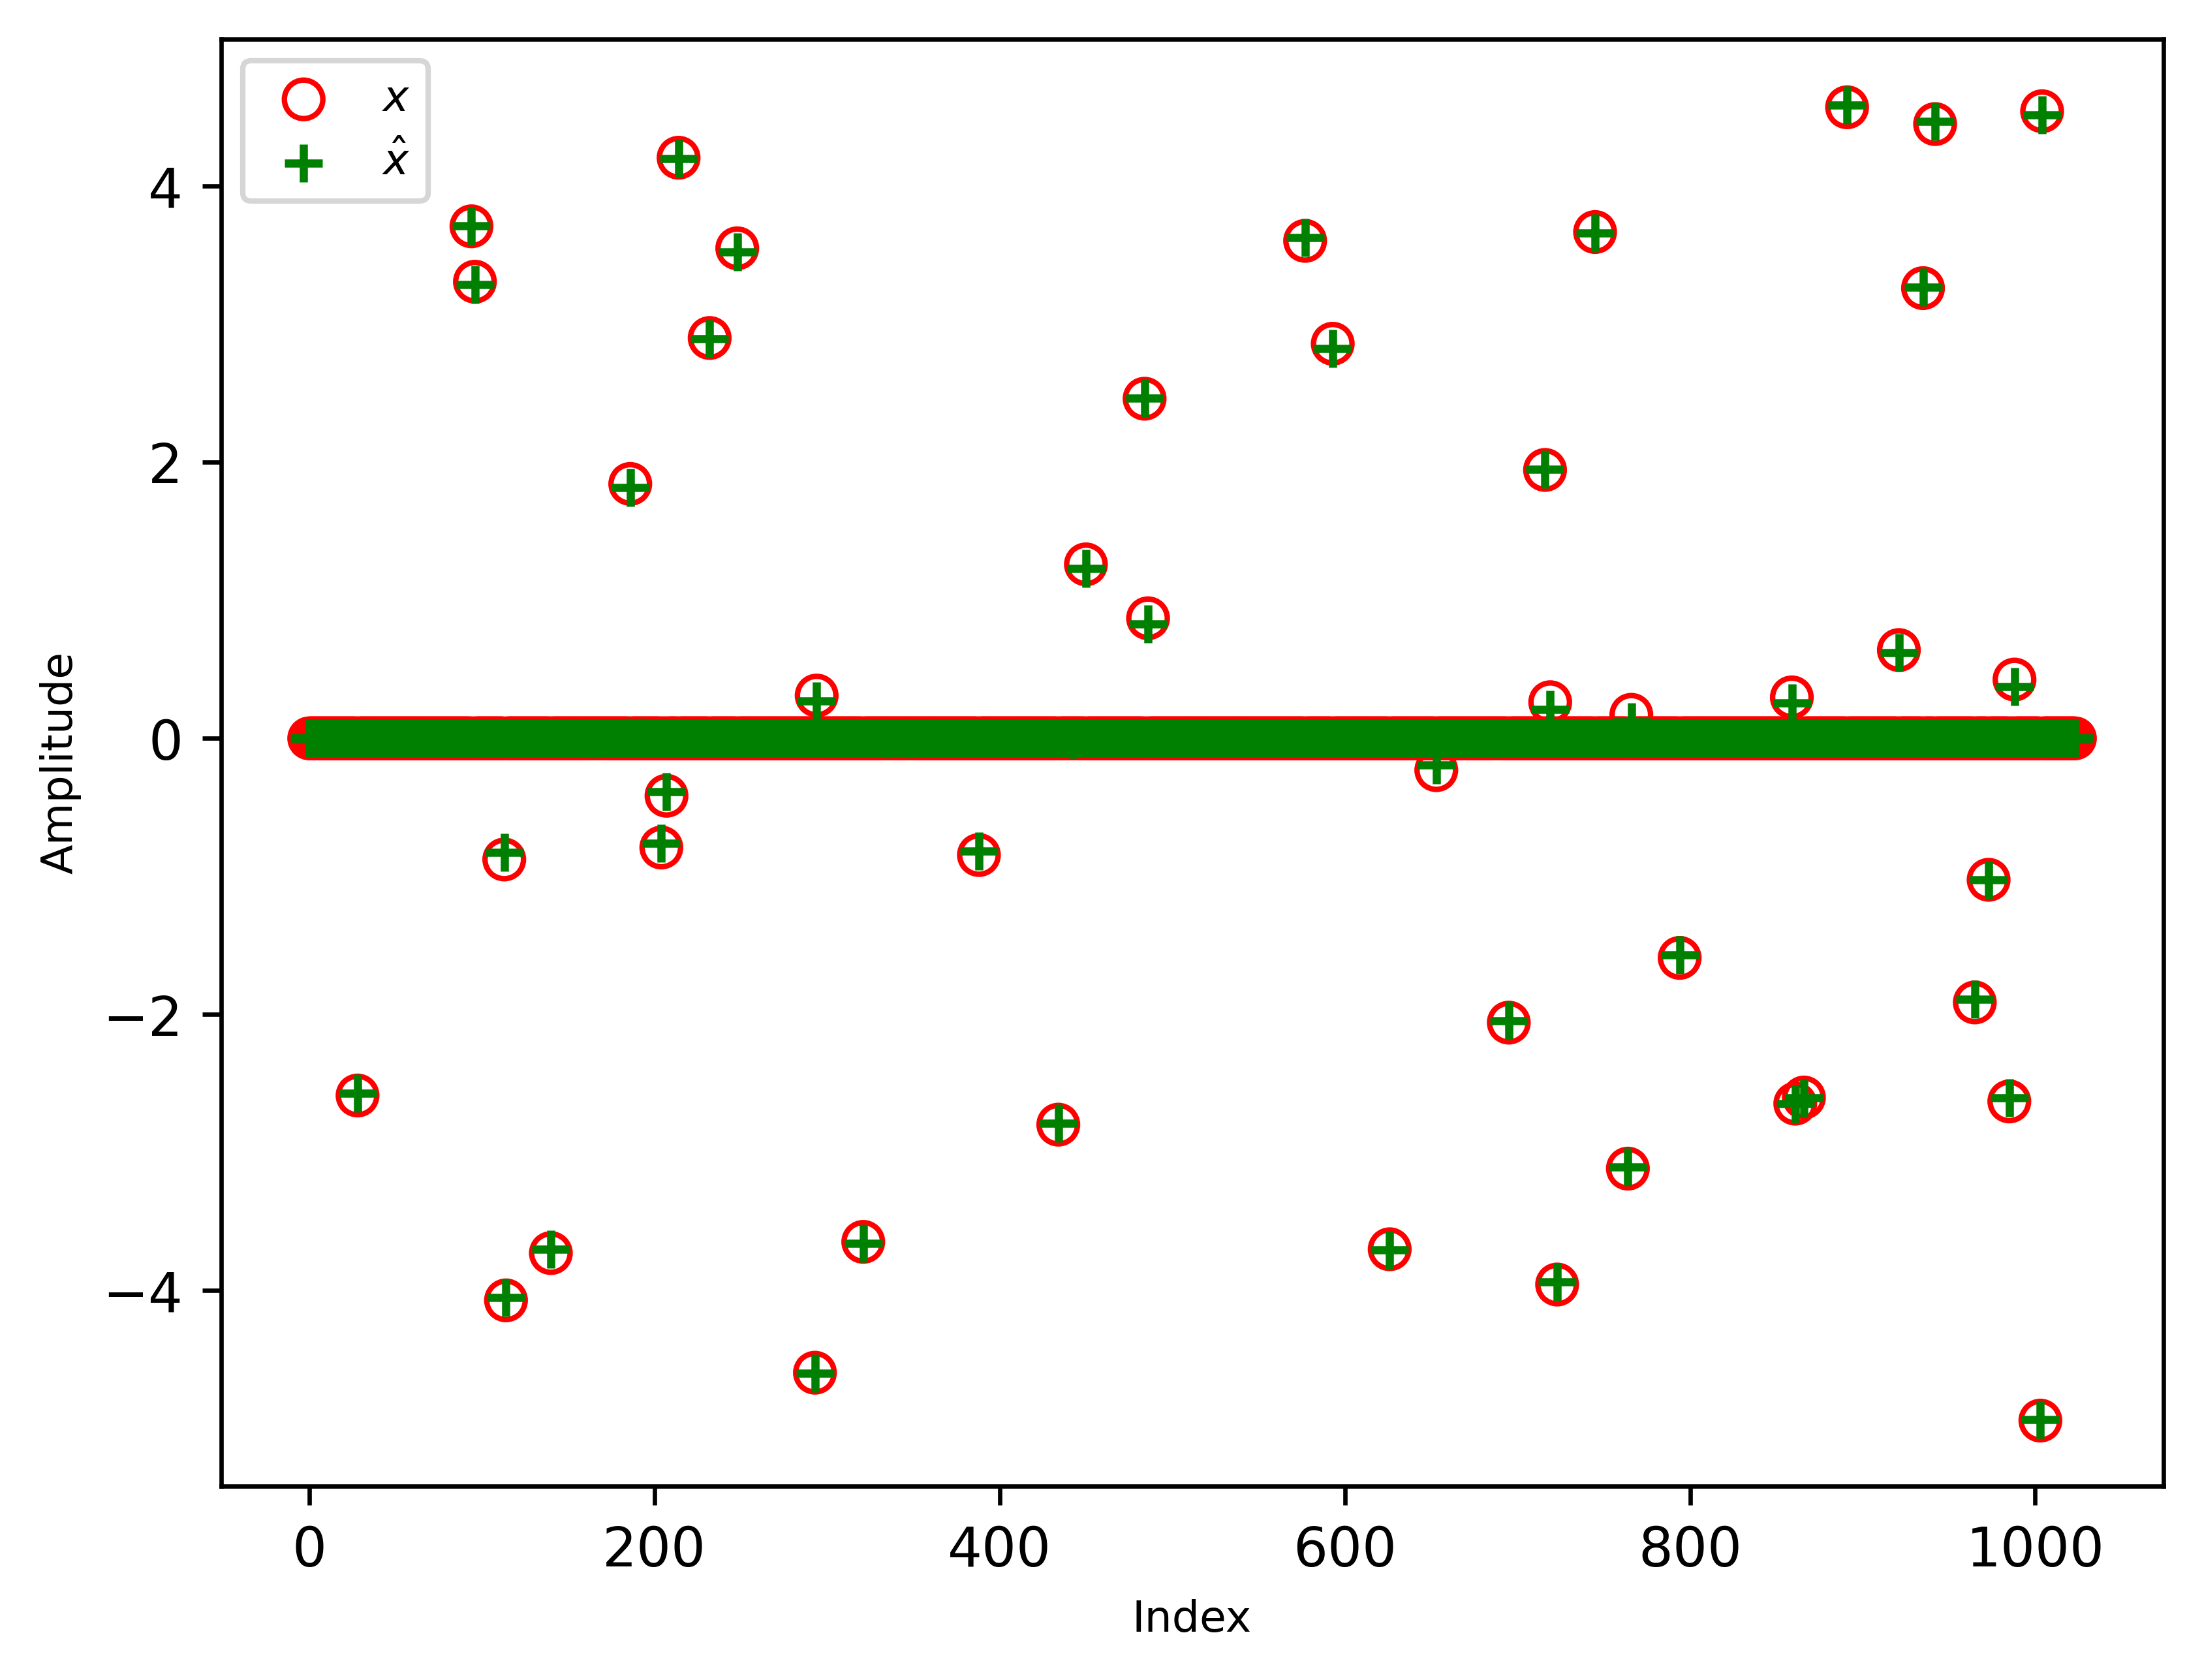

In [6]:
k = 45
Lambda = 0.05
sigma = 2

L=np.linalg.norm(A,2)**2
mu = 0.99*2/(L+Lambda/sigma**2)
for ww in range(100):
    x_true = rand(n,1,k/n).toarray()
    x_true[x_true != 0 ] = 10*(x_true[x_true != 0 ]-0.5)
    b = A.dot(x_true)
    b_noise = b
    Ab = A.T.dot(b_noise)
    AA = A.T.dot(A)
    
    t0 = time.process_time()
    temp = mu*Lambda/sigma**2
    if temp<=1:
        x,i=ISTA(A, b, mu, shrinkage_PiE_soft, sigma, Lambda, maxiter,error)
    else:
        x,i=ISTA(A, b, mu, PiEProximalbyLambertWThreshold, sigma, Lambda, maxiter,error)
    if np.linalg.norm(x-x_true)/np.linalg.norm(x_true)<0.01:
        print("Running time:",time.process_time() - t0)
        print('relative error:',np.linalg.norm(x-x_true)/np.linalg.norm(x_true))
        plt.figure()
        plt.scatter(x_index,x_true,color='none',marker='o' ,label=r'$x$',edgecolors='r', s=50)
        plt.rcParams['figure.dpi'] = 600 
        plt.scatter(x_index,x,marker='+',label=r'$\hat{x}$',color='g',s=50)
        plt.xlabel('Index',fontsize=8)
        plt.ylabel('Amplitude',fontsize=8)
        plt.legend(loc='upper left',fontsize = 8) 
        plt.show()
        break